In [7]:
import torch
from network import components as cnn
from network import functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms

import numpy as np
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [25]:
transform = transforms.Compose([
    transforms.ToTensor(),  # convert to tensor
    #transforms.Lambda(lambda x: x.view(-1))  # flatten into vector
])

batches = 128
NORM = 'batch'

# Load Data

In [26]:
def load_data():
    mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
    trainloader = DataLoader(mnist_trainset, batch_size=batches, shuffle=True)
    test_loader = DataLoader(mnist_testset, batch_size=batches, shuffle=False)
    return trainloader, test_loader

In [27]:
train, test = load_data()

# Model

In [28]:
class LeNet(cnn.Model):
    def __init__(self, input_size, output_size):
        super(LeNet, self).__init__()
        
        self.network = [
            cnn.Convolution(input_size, kernel_size=(5,5), channels = 5, padding = (2,2)),
            cnn.Sigmoid(),
            cnn.Pooling((28,28), window_size=(2,2), stride = 2),
            cnn.Convolution((14,14), kernel_size=(5,5), channels = 3),
            cnn.Sigmoid(),
            cnn.Pooling((10,10), window_size=(2,2), stride = 2),
            cnn.Batch_Flatten(),
            cnn.FullyConnected(5 * 5 * 3,120),
            cnn.Sigmoid(),
            cnn.FullyConnected(120,84),
            cnn.Sigmoid(),
            cnn.FullyConnected(84,output_size),
            cnn.Softmax()
        ]
        
        return

In [29]:
class TestModel(cnn.Model):
    def __init__(self, input_size, hidden_size, output_size):
        super(TestModel, self).__init__()
        
        self.network = [
            cnn.Convolution(input_size, kernel_size=(5,5), channels = 2, norm=NORM),#, padding = (1,1))
            cnn.Sigmoid(),
            cnn.Convolution((24,24), kernel_size=(5,5), norm=NORM),
            cnn.Sigmoid(),
            cnn.Batch_Flatten(),
            cnn.FullyConnected(20 * 20 * 2,hidden_size, norm=NORM),
            cnn.Sigmoid(),
            cnn.FullyConnected(hidden_size,output_size, norm=NORM),
            cnn.Softmax()
        ]
        
        return
   

In [30]:
class MLP(cnn.Model):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        
        self.network = [
            cnn.Batch_Flatten(),
            cnn.FullyConnected(input_size,hidden_size, norm=NORM),
            cnn.Sigmoid(),
            cnn.FullyConnected(hidden_size,output_size, norm=NORM),   
            cnn.Softmax()
        ]
        
        return


In [31]:
class PoolNet(cnn.Model):
    def __init__(self, input_size, output_size):
        super(PoolNet, self).__init__()
        
        self.network = [
            cnn.Convolution(input_size, kernel_size=(5,5), channels = 3, stride=1, padding=(2,2), norm=NORM),
            cnn.Sigmoid(),
            cnn.Pooling((28, 28), window_size=(2,2), _type='AVG', stride = 2),#, padding = (1,1))
            cnn.Batch_Flatten(),
            cnn.FullyConnected(14 * 14 * 3,120, norm=NORM),
            cnn.Sigmoid(),
            cnn.FullyConnected(120,50, norm=NORM),
            cnn.Sigmoid(),
            cnn.FullyConnected(50,10, norm=NORM),
            cnn.Softmax()
        ]
        
        return

In [32]:

class SimpleModel(cnn.Model):
    def __init__(self, input_size):
        super(SimpleModel, self).__init__()
        
        self.network = [
            cnn.Convolution(input_size, kernel_size=(3,3), channels = 3, stride=1, padding=(1,1), norm=NORM),
            cnn.Sigmoid(),
            cnn.Pooling((28, 28), window_size=(2,2), _type='AVG', stride = 2),
            cnn.Convolution((14,14), kernel_size=(3,3), channels = 3, stride=1, padding=(1,1), norm=NORM),
            cnn.Sigmoid(),
            cnn.Pooling((14, 14), window_size=(2,2), _type='AVG', stride = 2),
            cnn.Batch_Flatten(),
            cnn.FullyConnected(7 * 7 * 3,70, norm=NORM),
            cnn.Sigmoid(),
            cnn.FullyConnected(70,10, norm=NORM),
            #cnn.Softmax()
        ]
        
        return

# Train

In [33]:
model = PoolNet((28,28), 10)

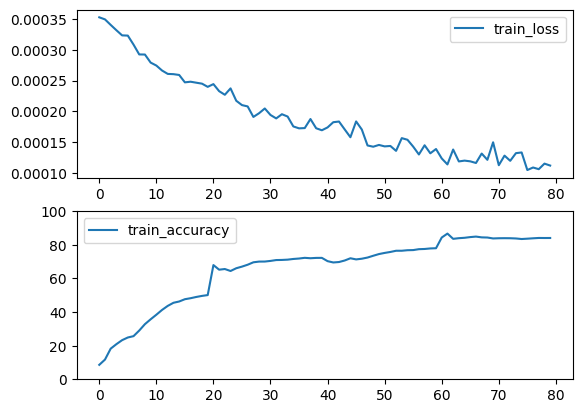

Epoch: 3, it: 83/80 [train_loss: 0.00011], [train_accuracy: 84.1]


In [34]:
loss_function = F.MSELoss()
trial = F.TrainManager(train=train, test=test)
trial.train(model, loss_func=loss_function, num_batches=20, epochs=4, lr=0.0002, loss_plot=True)

In [36]:
#print(f"LENET KERNELS 1: {trial.trained_model.network[0].kernels}")
#print(f"LENET KERNELS 2: {trial.trained_model.network[3].kernels}")

  0%|          | 0/79 [00:00<?, ?it/s]

LAYER 0: torch.Size([16, 3, 28, 28])
BATCH: 0


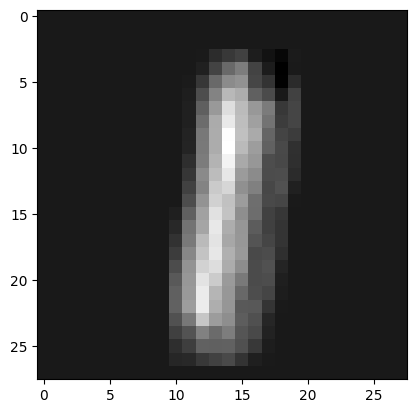

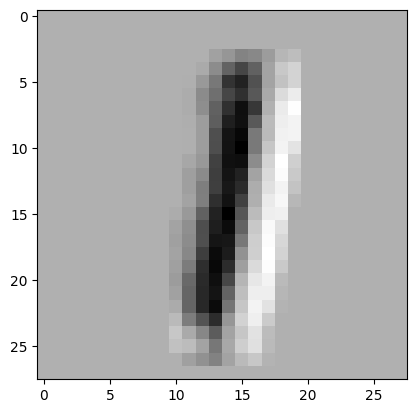

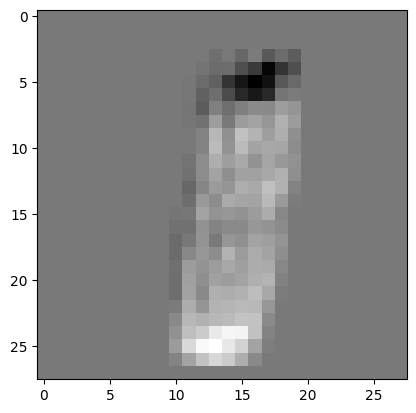

BATCH: 1


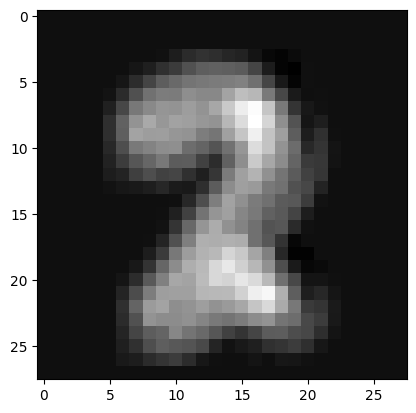

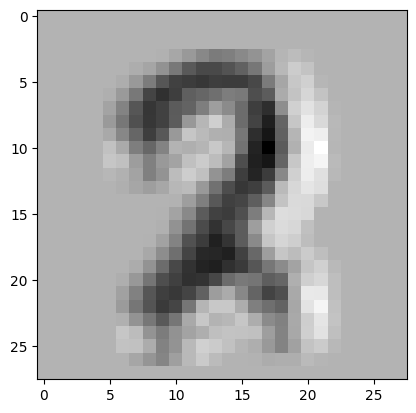

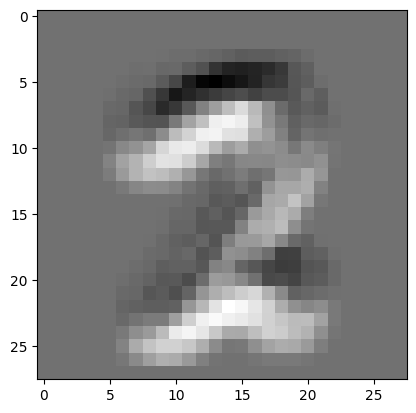

LAYER 1: torch.Size([16, 3, 28, 28])
BATCH: 0


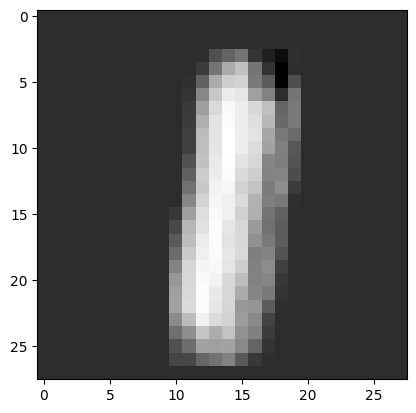

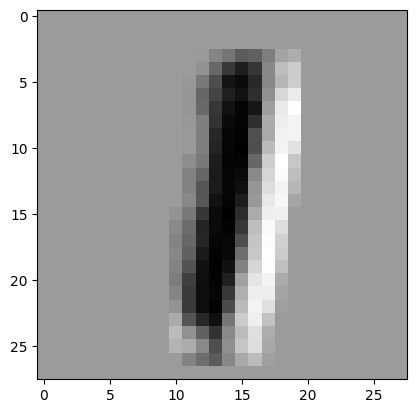

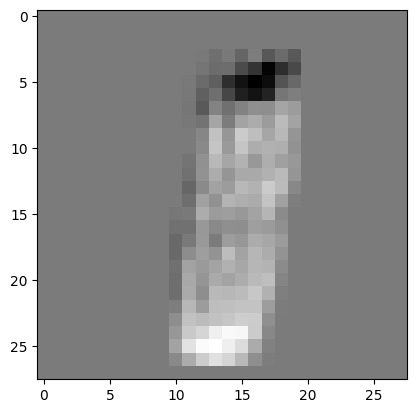

BATCH: 1


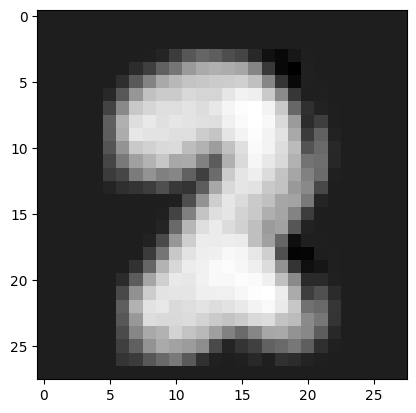

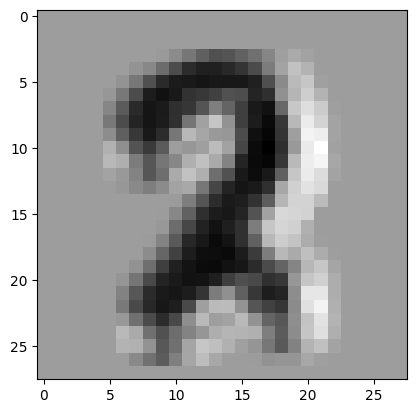

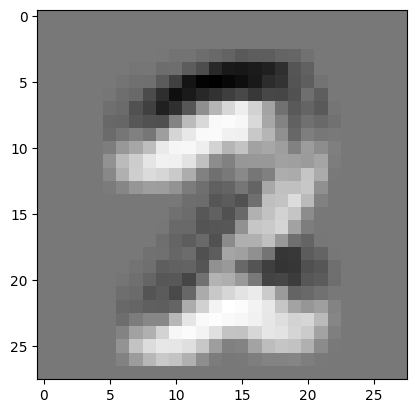

LAYER 2: torch.Size([16, 3, 14, 14])
BATCH: 0


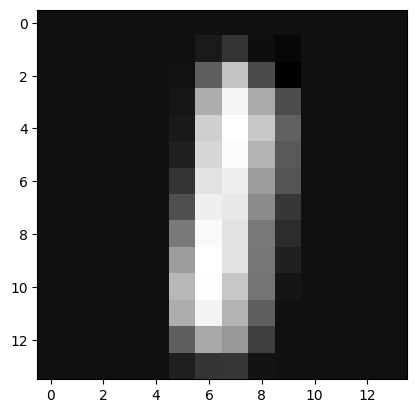

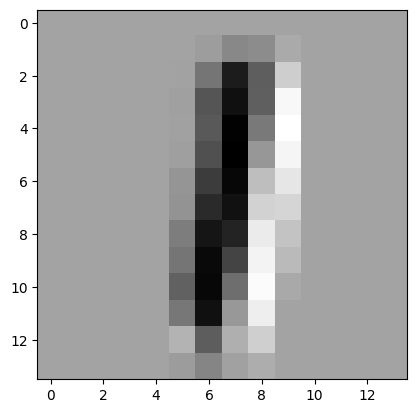

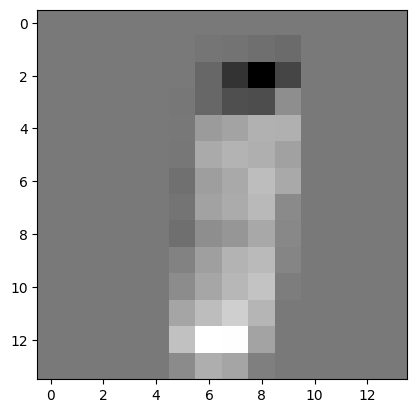

BATCH: 1


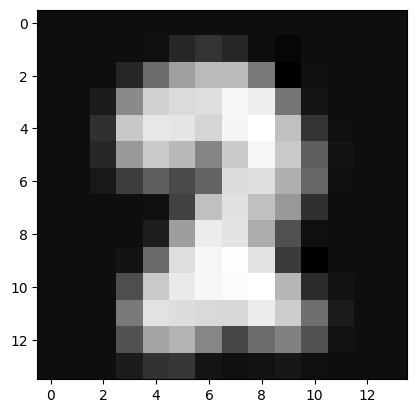

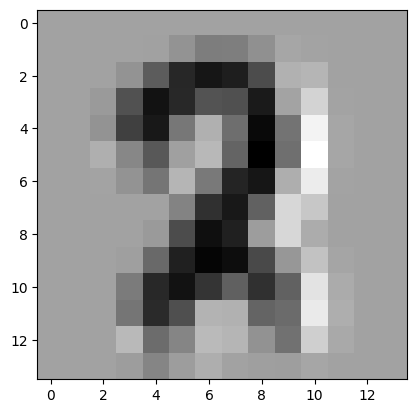

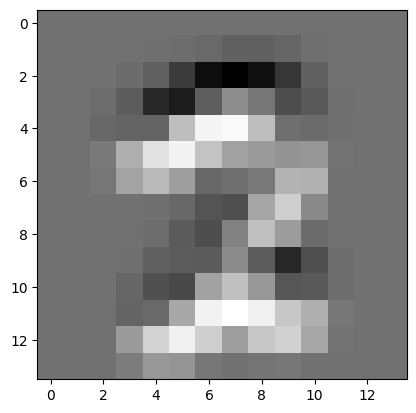

c:\Users\jugwu\Documents\justins_work\CNN\network\components.py:46: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  plt.bar(torch.range(1, label.size()[0])-1, distribution)


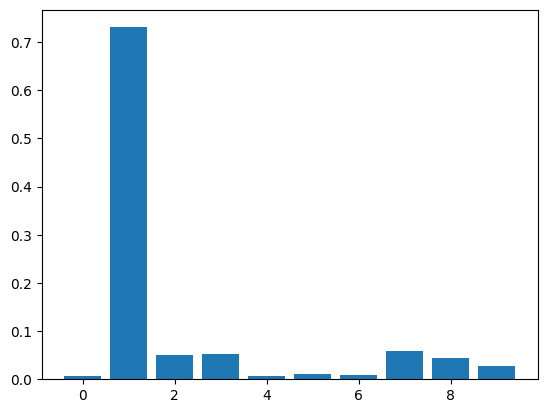

LABEL: 1


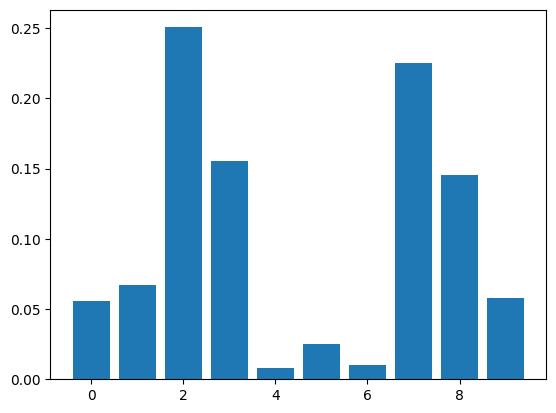

LABEL: 2
[test_accuracy: 85.4108657836914]


In [37]:
trial.test(num_examples=2)

In [38]:
import torch.nn.functional as T
import torchvision.transforms as transforms
from torch import nn
from torch import optim


class CNNmodel(nn.Module):
    def __init__(self):
        super(CNNmodel, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, (5, 5),padding=2)
        self.conv2 = nn.Conv2d(6, 16, (5, 5))
        self.fc1 = nn.Linear(5 * 5 * 16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        out = self.conv1(x)
        out = T.sigmoid(out)
        out = T.avg_pool2d(out, (2,2), stride=2)
        out = self.conv2(out)
        out = T.sigmoid(out)
        out = T.avg_pool2d(out, (2,2), stride=2)
        out = out.view(out.shape[0], -1)
        out = self.fc1(out)
        out = T.sigmoid(out)
        out = self.fc2(out)
        out = T.sigmoid(out)
        out = self.fc3(out)
        out = T.softmax(out)
        return out

In [39]:
Cmodel = CNNmodel()
loss_function = nn.CrossEntropyLoss()
optimiser = optim.Adam(Cmodel.parameters(), lr=0.001)#, momentum = 0.9)
#Cmodel.fc1.requires_grad_(False)

In [40]:
limit = 0
count = 0 
total = 0
correct = 0

for test_batch in test:
    if total > 100:
        break
    total += 1
    if count < limit:
        result = Cmodel(test_batch[0])
        print(result)
        plt.bar([0,1,2,3,4,5,6,7,8,9], result[0].detach().numpy())
        plt.show()
        plt.figure()
        count += 1
    else:
        result = Cmodel(test_batch[0])
        #print(result.shape)
    if torch.argmax(result[0]) == test_batch[1][0]:
        correct += 1

print("ACCURACY:", (correct/total) * 100 )

c:\Users\jugwu\anaconda3\envs\differ\lib\site-packages\torch\nn\functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
C:\Users\jugwu\AppData\Local\Temp\ipykernel_17456\2532763018.py:29: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = T.softmax(out)


ACCURACY: 11.39240506329114
